# Download and filter Sentinel-1 images

**Why this module**: I oftentimes have to make a Dataset of Sentinel-1 images I can use for deep learning. This is quite difficult. I therefore made this module using, e.g., the SentinelAPI and ofter stuff. 

Simply put:
- Get Metadata from the region of interest.
- Filter the data, so you only get what you want
- Download, e.g., the thumbnails or the full data. 
- Can download thumbnaisl, raw, grd or slc. All is fine.



Requirements:
- User on Copernicus hub (for metadata)
- User on earthdata (for download)

# Imports

In [1]:
import sentinel_download
from sentinel_download import Sentinel_metadata, Satellite_download

## Fetching data near Denmark

Querying products: 100%|██████████| 445/445 [00:02<00:00, 124.29product/s]


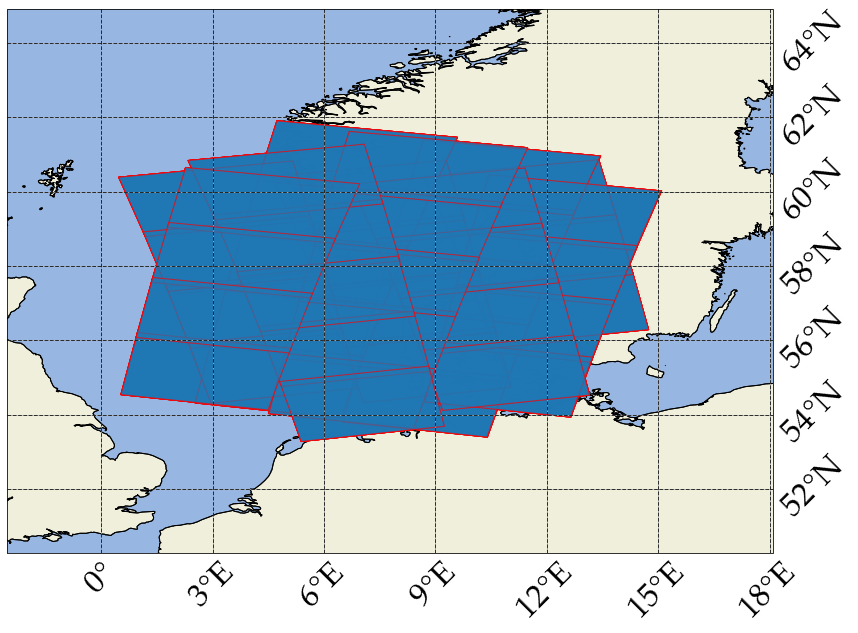

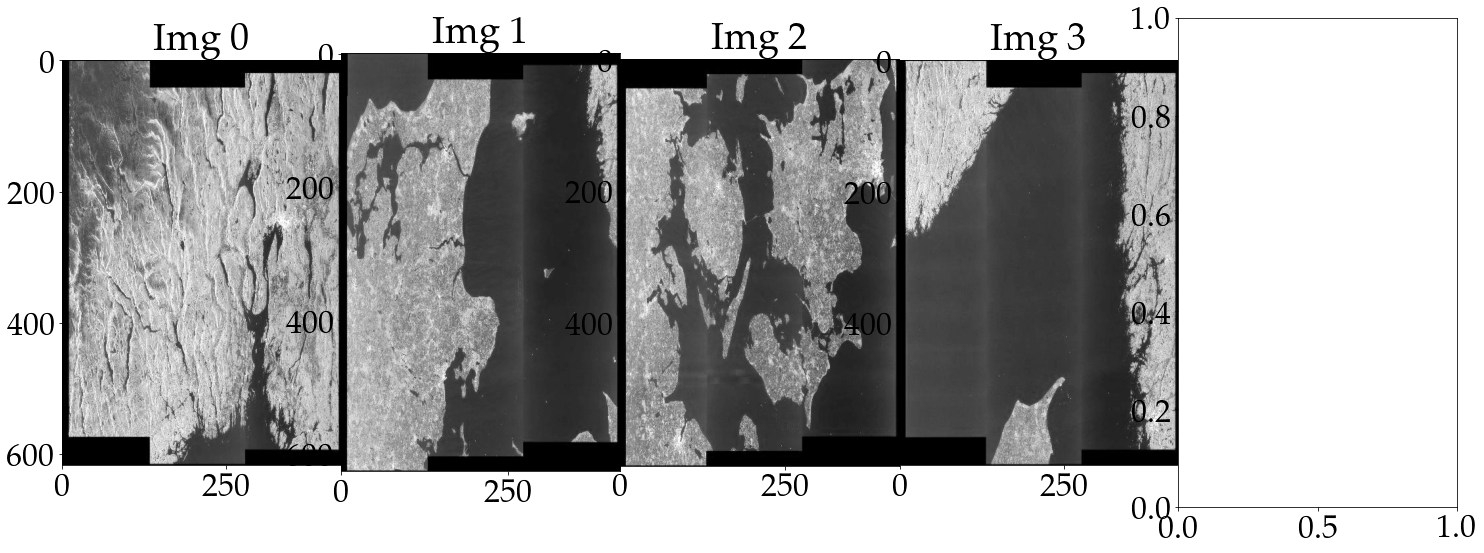

In [3]:
with Sentinel_metadata() as met:
    met.area([5,10,55,60])
    met.get_metadata(sensor='s1_slc',start_data='20220109',end_date='20220512')
    met.iw() #filer so we only have IW
    met.plot_image_areas() # Showing extent of images
    met.show_cross_pol(4) # Plotting the 5 first images.

# Download data

Alright, lets say that we want image 0 and 1, we simply do:

In [6]:
with Satellite_download(met.products_df[0:3]) as dwl:
    #if we want to download only the thumbnails
    dwl.download_thumbnails(folder='') 
    #if we want to download the entire image (grd, slc, or raw)
    dwl.download_sentinel_1(folder='')